## [NCTS]_Homework_Q11-1_MNIST_VAE_DavidChi

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider
from ipywidgets import interact_manual
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


# 讀入 MNIST 數據庫

In [2]:
# 由 Keras 讀入 MNIST
from keras.datasets import mnist

from keras.utils.vis_utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Input, Lambda
from keras.layers import Dense #DNN
from keras.layers import Conv2D, MaxPool2D #CNN
from keras.optimizers import SGD, Adam

# something userful
from keras import metrics
from keras import backend as K
from keras.utils import np_utils
from keras.preprocessing import sequence

#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

調整資料長相及單位化

In [3]:
x_train = x_train0.reshape(60000, -1)
x_test = x_test0.reshape(10000, -1)

x_train -= x_train.min()
x_train = x_train/x_train.max()

x_test -= x_test.min()
x_test = x_test/x_test.max()

# Autoencoder ---> 先壓縮，後還原
## 784維 ---> 100維  ---> 2維 ---> 100維 ---> 784維  

In [4]:
x = Input(shape=(784,))

#Encoder
enc_1 = Dense(100, activation='sigmoid')
enc_2 = Dense(2, activation='sigmoid')

h = enc_2(enc_1(x))

#Decoder
dec_2 = Dense(100, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

x_hat = dec_1(dec_2(h))

autoencoder = Model(x, x_hat)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


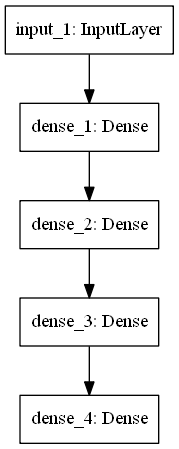

In [5]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='[NCTS]_Homework_Q11-1_MNIST_VAE_AutoEncoder_DavidChi.png')
from IPython.display import Image
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_AutoEncoder_DavidChi.png")

# 改變loss function和epochs次數

In [6]:
autoencoder.compile(loss='binary_crossentropy', optimizer=Adam() ,metrics=['accuracy'])

autoencoder.fit(x_train, x_train, batch_size=1024, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.4234 - acc: 0.7736
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2851 - acc: 0.8036
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2706 - acc: 0.8037
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2658 - acc: 0.8035
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2636 - acc: 0.8037
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2621 - acc: 0.8037
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2610 - acc: 0.8038
Epoch 8/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2599 - acc: 0.8039
Epoch 9/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2583 - acc: 0.8040: 2s 
Epoch 10/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2565 - acc: 0

In [7]:
model_json = autoencoder.to_json()
open('[NCTS]_Homework_Q11-1_MNIST_VAE_AutoEncoder_DavidChi.json', 'w').write(model_json)
autoencoder.save_weights('[NCTS]_Homework_Q11-1_MNIST_VAE_AutoEncoder_DavidChi.h5')

#autoencoder.load_weights('[NCTS]_Homework_Q11-1_MNIST_VAE_AutoEncoder_DavidChi.h5')

# 視覺化 - 子模型的取出

In [8]:
Encoder = Model(x, h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


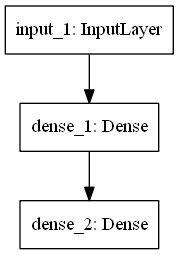

In [9]:
plot_model(Encoder, to_file='[NCTS]_Homework_Q11-1_MNIST_VAE_Encoder_DavidChi.png')
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_Encoder_DavidChi.png")

Decoder 是由 h 開始，因此，先準備一個與 h 相同大小的 Input，並餵進 dec_2 及 dec_1 中即可。

In [10]:
h_input = Input(shape=(2,))

Decoder = Model(h_input, dec_1(dec_2(h_input)))
Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


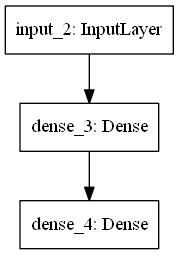

In [11]:
plot_model(Decoder, to_file='[NCTS]_Homework_Q11-1_MNIST_VAE_Decoder_DavidChi.png')
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_Decoder_DavidChi.png")

上述已經進行下列事項
1. 讀套件
2. 讀資料
3. 建立並訓練 Autoencoder
4. 定義兩個子模型(Encoder & Decoder)

# 視覺化 - Encoder

先隨便抽取一張圖，並透過 Encoder 來算出它的 Latent 表示。

In [12]:
idx = np.random.randint(x_train.shape[0])

print("第 %d 圖的 Latent 表示為 %s" %(idx, Encoder.predict(x_train[idx: idx + 1])))

第 41335 圖的 Latent 表示為 [[0.00059832 0.46607408]]


In [13]:
indices = np.random.randint(x_test.shape[0], size=3000)

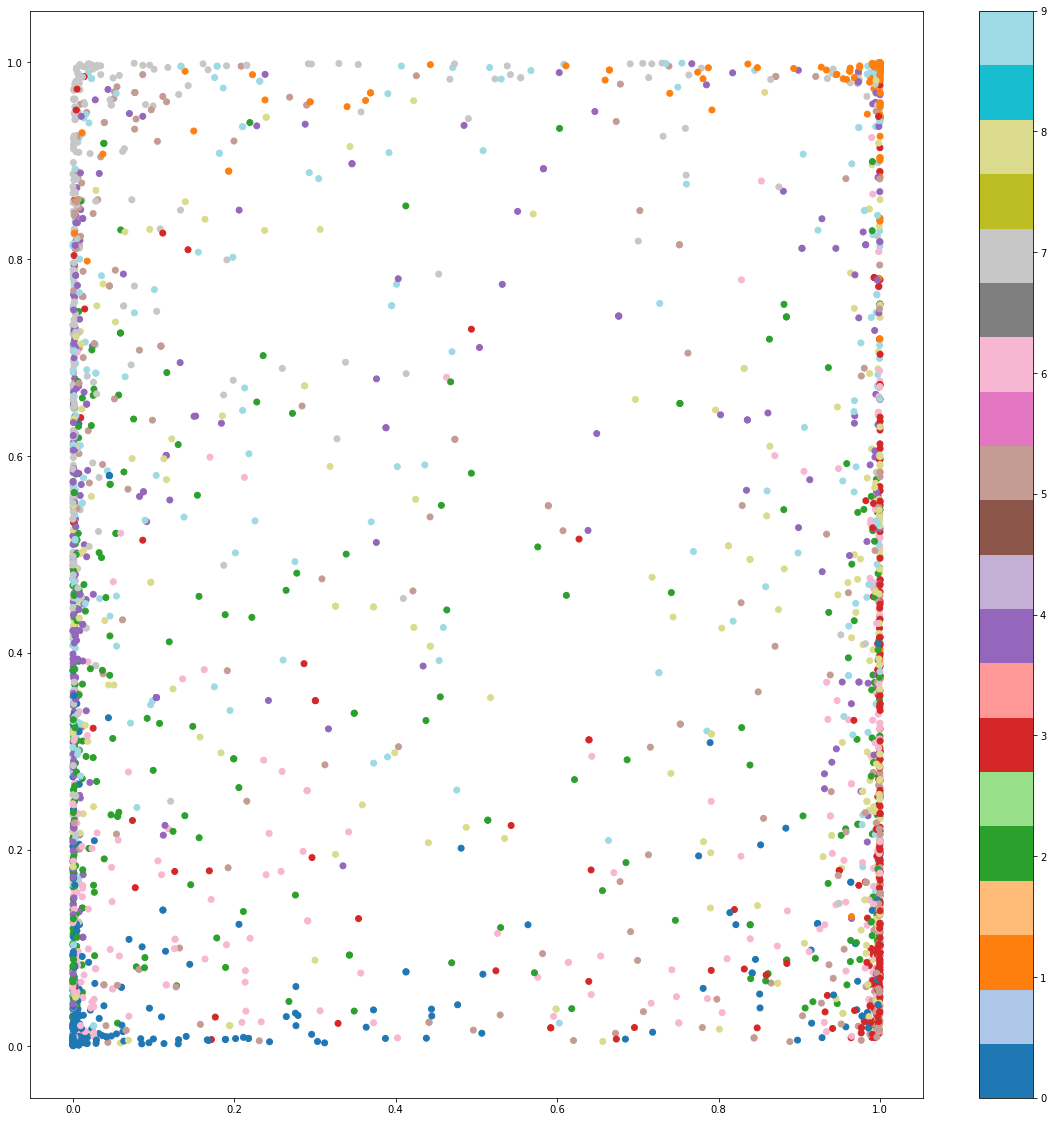

In [14]:
latent = Encoder.predict(x_test[indices])
latent.shape

plt.figure(figsize=(20, 20))
plt.scatter(latent[:, 0], latent[:, 1], c=y_test0[indices], cmap="tab20")
plt.colorbar()
plt.show()

# 視覺化 - Decoder

In [17]:
n = 32
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [18]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

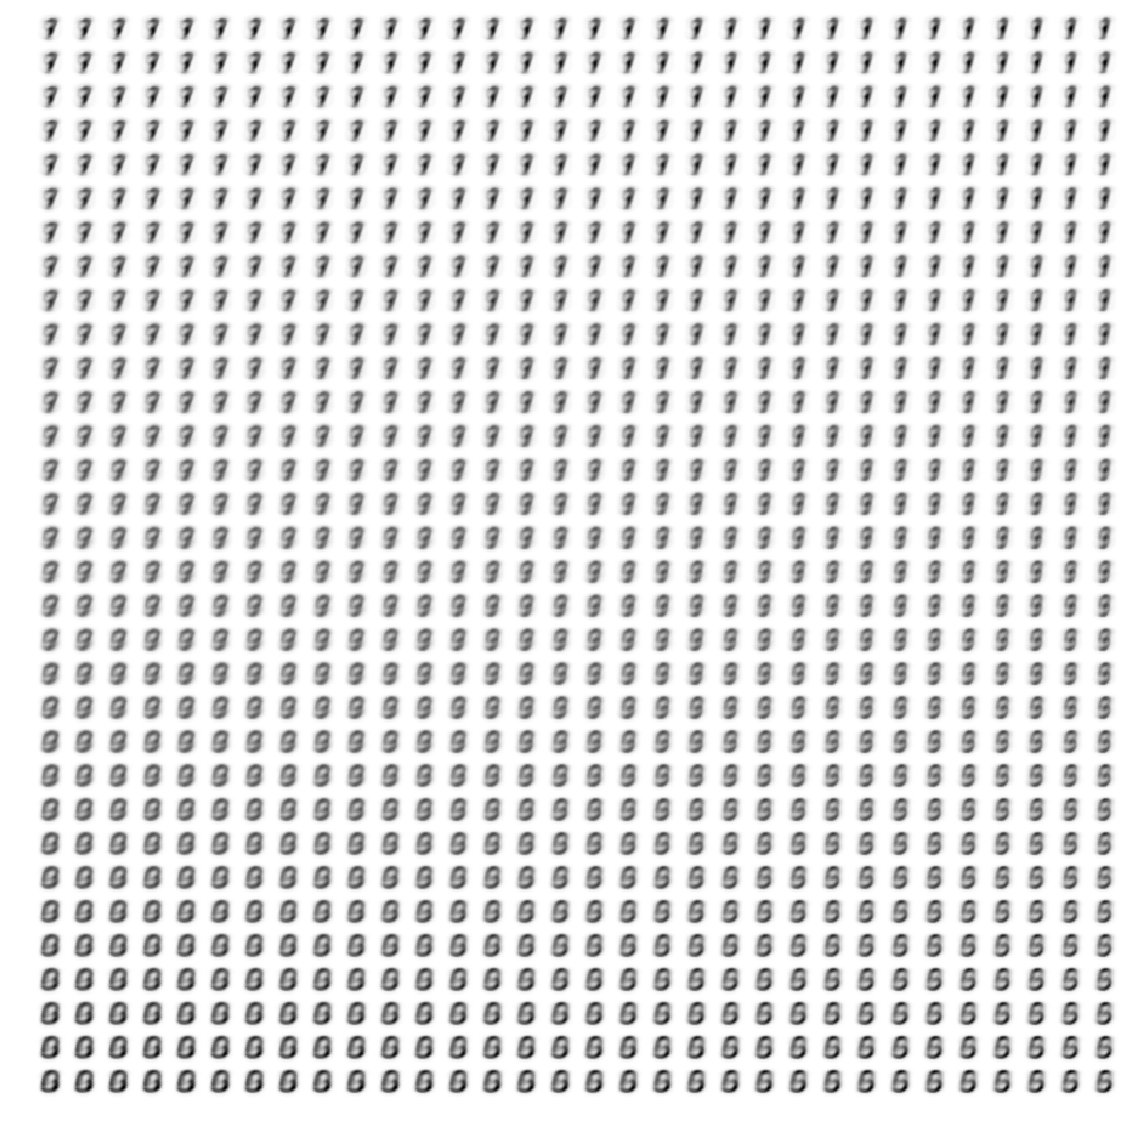

In [19]:
plt.figure(figsize=(20, 20))
plt.imshow(figure, cmap='Greys')
plt.axis('off')
plt.show()

# Variational Autoencoder


## 用上面的Autoencoder進一步做Variational Autoencoder，建立 VAE

In [20]:
enc_1 = Dense(100, activation='sigmoid')

enc_mean = Dense(2)
enc_log_var = Dense(2)

dec_2 = Dense(100, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

In [21]:
x = Input(shape=(784,))
enc_x = enc_1(x)

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

定義抽樣函數並透過 Lambda 將其轉換成 Keras layer。

In [22]:
#標準2維常態分佈的抽樣，下方是公式描述
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2,), mean=0., stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [23]:
#把　([z_mean, z_log_var])　送入　Lambda（）抽樣
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

In [24]:
dec_x = dec_2(z)
x_hat = dec_1(dec_x)

In [25]:
VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          78500       input_3[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

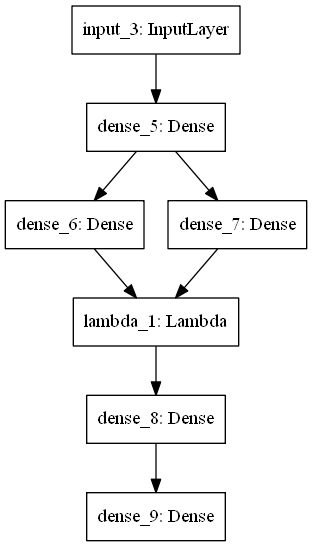

In [26]:
plot_model(VAE, to_file='[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_DavidChi.png')
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_DavidChi.png")

# Loss 函數的建立

VAE 的 Loss 函數，其由來牽扯一些訊息理論 (information theory) 的知識，因此，我們在此直接建立訓練 VAE 時的 Loss 數。

VAE 的理論參考：

Auto-Encoding Variational Bayes https://arxiv.org/pdf/1312_6114.pdf

Tutorial on Variational Autoencoders https://arxiv.org/pdf/1606_05908.pdf

In [27]:
def vae_loss(x, x_recon):  
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return recovery_loss + kl_loss

# 訓練 VAE

In [29]:
VAE.compile(loss=vae_loss, optimizer=Adam() ,metrics=['accuracy'])

VAE.fit(x_train, x_train, batch_size=1024, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 206.6378 - acc: 0.0140
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 198.4902 - acc: 0.0124
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 194.3904 - acc: 0.0112
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 191.2825 - acc: 0.0094
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 188.4382 - acc: 0.0075
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 186.6343 - acc: 0.0073
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 185.5516 - acc: 0.0064
Epoch 8/20
60000/60000 [==============================] - 4s 71us/step - loss: 184.2310 - acc: 0.0065
Epoch 9/20
60000/60000 [==============================] - 4s 70us/step - loss: 183.3778 - acc: 0.0075
Epoch 10/20
60000/60000 [==============================] - 4s 70us/step - loss: 18

In [30]:
model_json = VAE.to_json()
open('[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_DavidChi.json', 'w').write(model_json)
VAE.save_weights('[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_DavidChi.h5')

#VAE.load_weights('[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_DavidChi.h5')

# VAE 視覺化呈現

In [31]:
VAE_Encoder = Model(x, z_mean)
VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


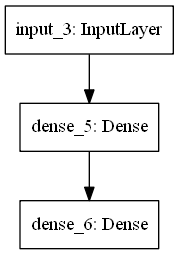

In [32]:
plot_model(VAE_Encoder, to_file='[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_Encoder_DavidChi.png')
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_Encoder_DavidChi.png")

In [33]:
VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))
VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_9 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


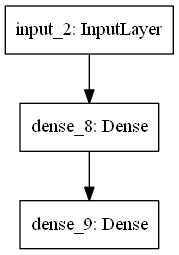

In [34]:
plot_model(VAE_Decoder, to_file='[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_Decoder_DavidChi.png')
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_VAE_Decoder_DavidChi.png")

In [35]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 Latent 表示為 %s" %(idx, Encoder.predict(x_train[idx: idx+1])))

第 24023 圖的 Latent 表示為 [[0.08277413 0.07071007]]


In [36]:
VAE_latent = VAE_Encoder.predict(x_test[indices])
VAE_latent.shape

(3000, 2)

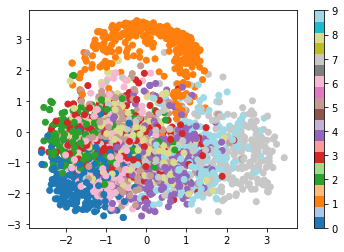

In [37]:
plt.scatter(VAE_latent[:, 0], VAE_latent[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()
plt.show()

## 定義正規化函數

In [38]:
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

In [39]:
grid_x_vae = np.linspace(-4 + 0.05, 4 - 0.05, n)
grid_y_vae = np.linspace(-4 + 0.05, 4 - 0.05, n)

VAE_figure = np.zeros((digit_size * n, digit_size * n))

for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array( [ [xi, yi] ] )
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n - i - 1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)

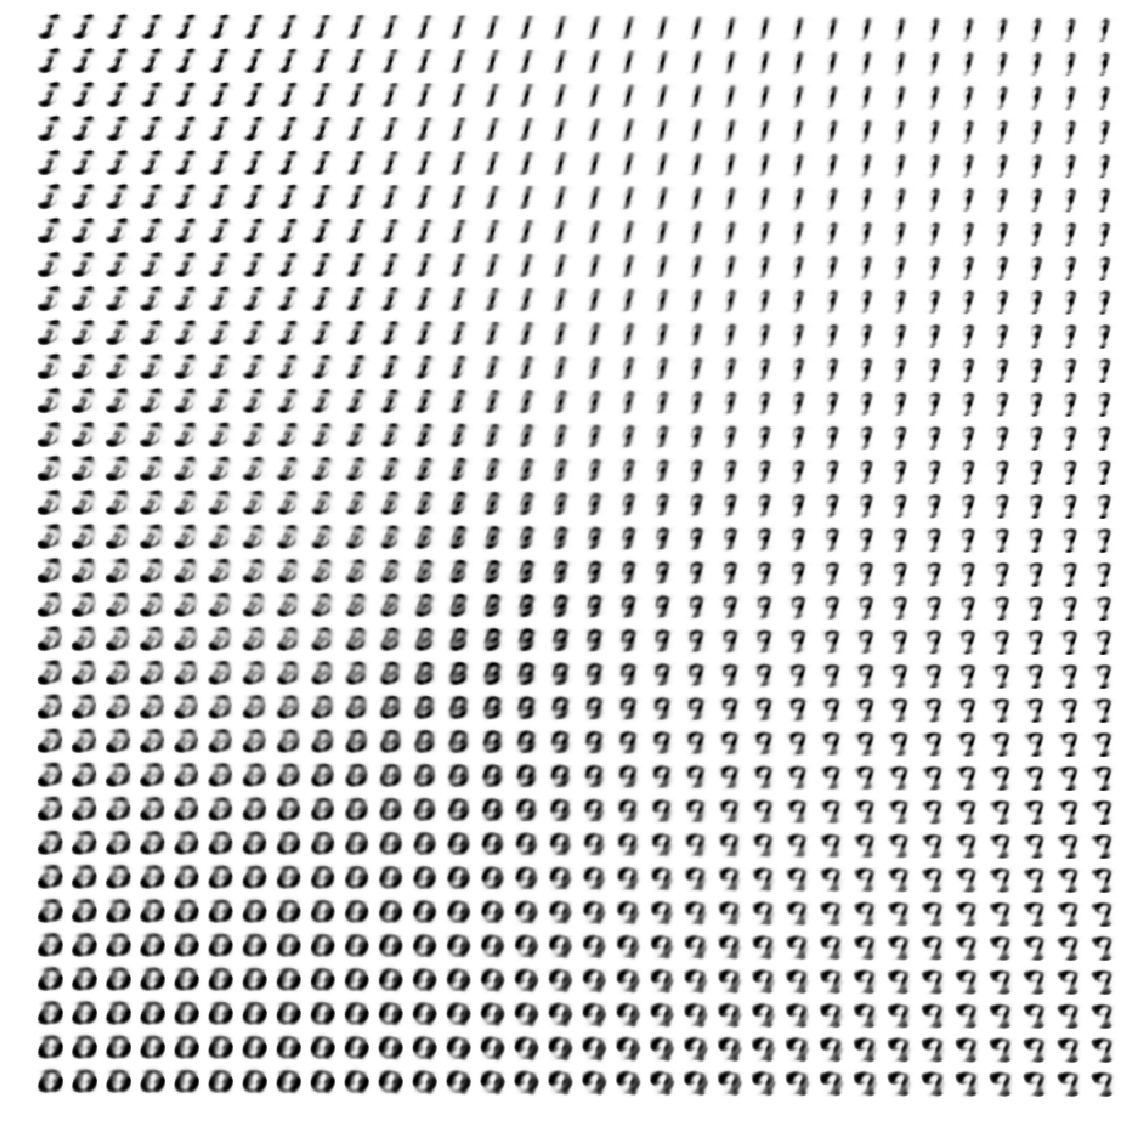

In [40]:
plt.figure(figsize=(20, 20))
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

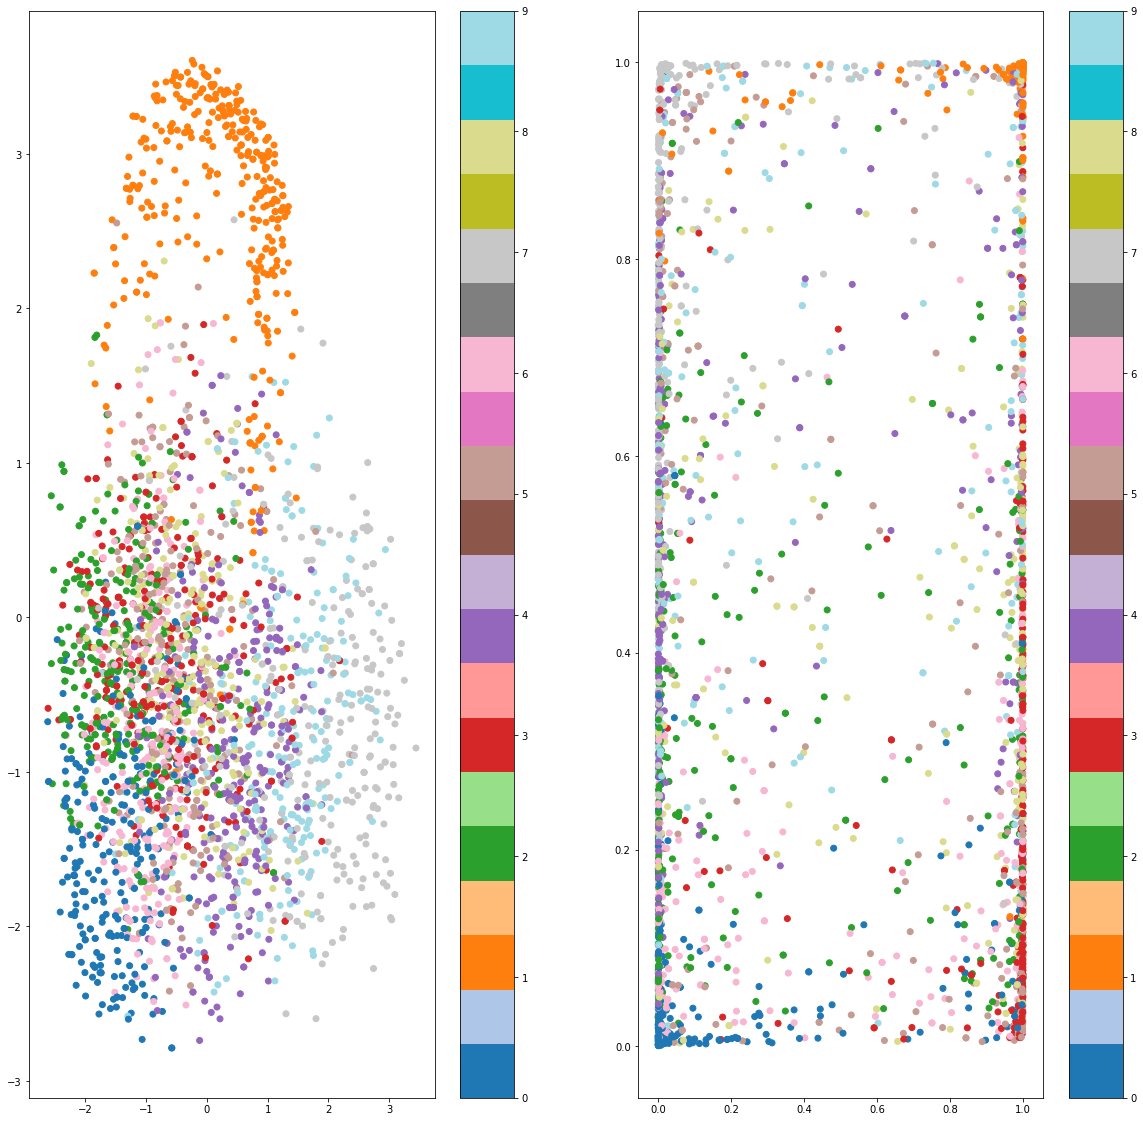

In [41]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.scatter(VAE_latent[:, 0], VAE_latent[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(latent[:, 0], latent[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()
plt.show()

# 動態比較

In [44]:
idx_1, idx_2 = np.random.randint(x_test.shape[0], size = 2)

def inBetween(t):
    data_0 = x_train0[idx_1]
    data_1 = x_train0[idx_2]
    data_t = (1 - t) * x_train0[idx_1] + t * x_train0[idx_2]

    mu_0 = VAE_Encoder.predict(x_train[idx_1:idx_1 + 1]).squeeze()
    mu_1 = VAE_Encoder.predict(x_train[idx_2:idx_2 + 1]).squeeze()
    mu_t = (1 - t) * mu_0 + t * mu_1

    plt.figure(figsize = (10, 8))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1], label='[Original]')
    ax1.scatter(mu_1[0], mu_1[1], label='[After]')
    ax1.scatter(mu_t[0], mu_t[1], label='[Changing]')
    ax1.legend()
    ax1.plot([mu_0[0], mu_1[0]], [mu_0[1], mu_1[1]], ls = '-.', alpha = 0.7)
    
    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')

In [45]:
interact(inBetween, t = FloatSlider( value = 0.5, 
                                       min = 0, 
                                       max = 1.0,
                                      step = 0.02,))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.02), Output()), _dom_classes=('w…

<function __main__.inBetween(t)>

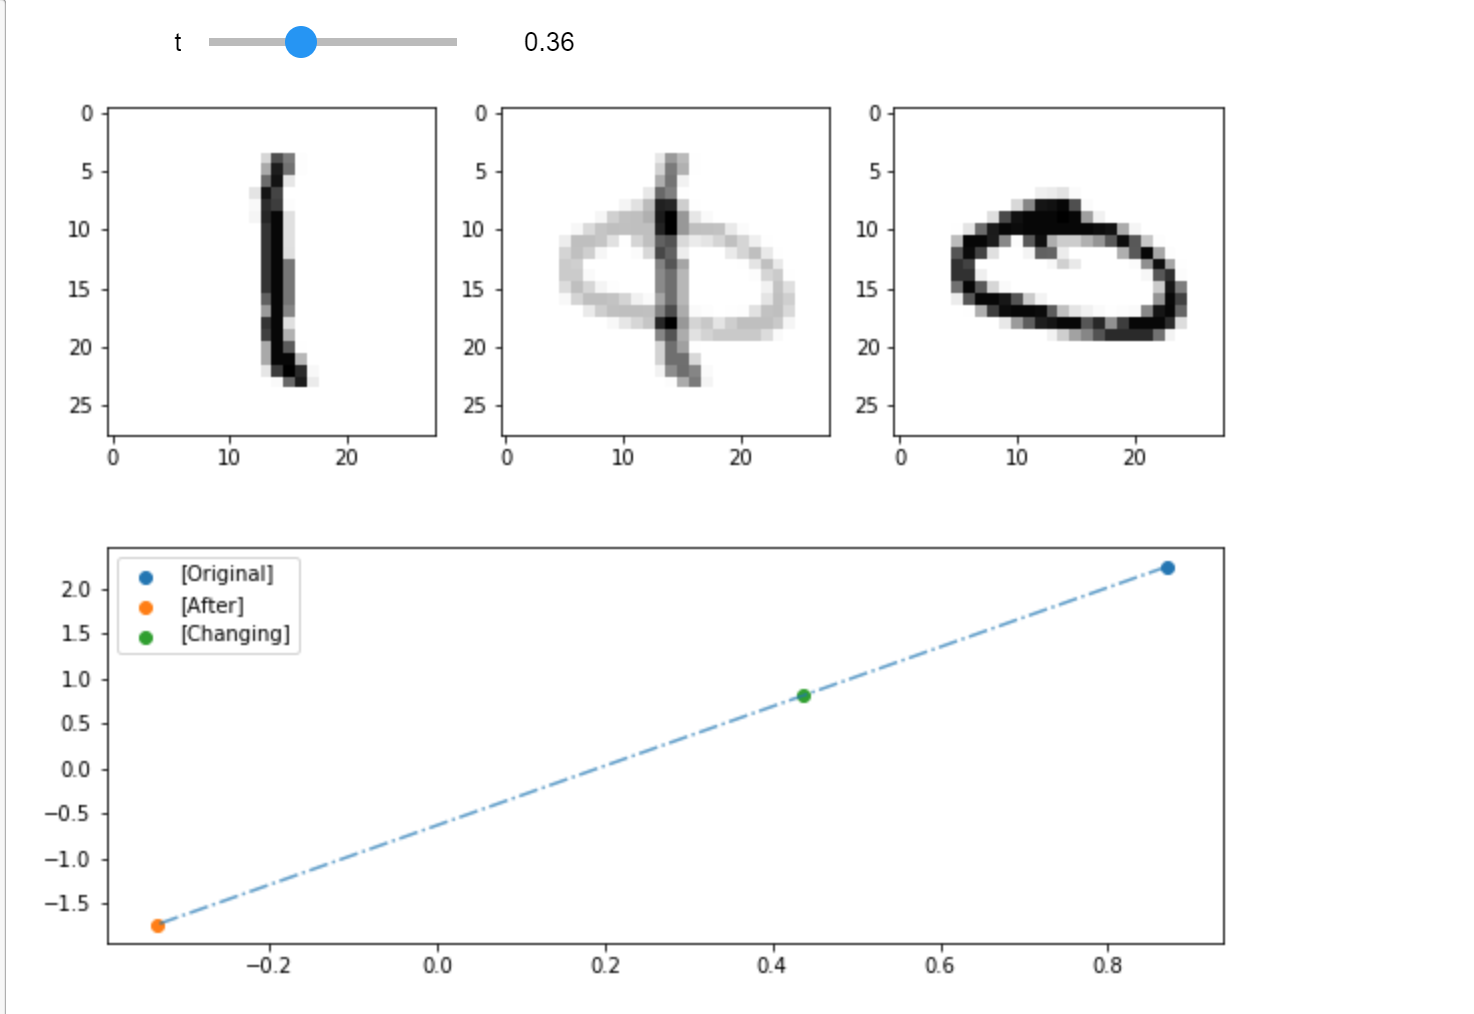

In [46]:
Image(filename="[NCTS]_Homework_Q11-1_MNIST_VAE_DavidChi.png")